In [2]:
import math
import numpy
from matplotlib import pyplot
%matplotlib inline

# import scrypt from doublet lesson 
import doublet

# import scrypt from vortex lesson
import vortex

In [3]:
N = 50 

x_start, x_end = -2.0, 2.0
y_start, y_end = -1.0, 1.0
x = numpy.linspace(x_start, x_end, N)
y = numpy.linspace(y_start, y_end, N)
X, Y = numpy.meshgrid(x,y)



(-2.0, 2.000000000000005, -1.0, 1.0000000000000022)

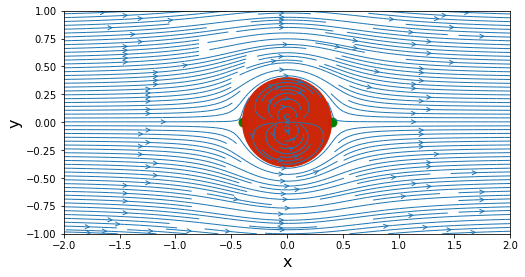

In [4]:
# These are variables for the doublet (from doublet assignment)
kappa = 1.0
x_doublet, y_doublet = 0.0, 0.0
u_inf = 1.0


### This section is for the doublet ###
#import function for doublet velocity from doublet.py scrypt 

#calculate the velocity field mesh grid 
u_doublet, v_doublet = doublet.get_velocity_doublet(kappa, x_doublet, y_doublet, X, Y)

#compute the stream-function on the mesh grid
psi_doublet = doublet.get_stream_function_doublet(kappa, x_doublet, y_doublet, X, Y)

# freestream velocity components for the doublet
u_freestream = u_inf * numpy.ones((N,N), dtype=float)
v_freestream = numpy.zeros((N,N), dtype=float)

# stream-function of the freestream flow 
psi_freestream = u_inf * Y

# superpostion of the doublet on the freestream flow
u = u_freestream + u_doublet
v = v_freestream + v_doublet
psi = psi_freestream + psi_doublet

#plot the streamlines
pyplot.figure(figsize=(8.0, 8.0))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
#pyplot.xlim(x_start, x_end)
#pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_doublet, y_doublet, color='#CD2305', s=80, marker='o')

# calculate the cylinder radius and the add the cylinder to the figure
R = math.sqrt( kappa / (2 * math.pi * u_inf))
circle = pyplot.Circle((0,0), radius=R, color ='#CD2305', alpha=5.0)
pyplot.gca().add_patch(circle)
                               
# calculate the stagnation points and add them to the figure 
x_stagn1, y_stagn1 = +math.sqrt(kappa / (2*math.pi*u_inf)), 0.0
x_stagn2, y_stagn2 = -math.sqrt(kappa / (2*math.pi*u_inf)), 0.0
pyplot.scatter([x_stagn1, x_stagn2], [y_stagn1, y_stagn2], color='g', s=80, marker='o');

pyplot.axis('scaled', adjustable='box');

## end of doublet##

In [48]:
## start of the vortex ##

gamma = 4.0
x_vortex, y_vortex = 0.0, 0.0

# velocity field
u_vortex, v_vortex = vortex.get_velocity_vortex(gamma, x_vortex, y_vortex, X, Y)

# stream-function
psi_vortex = vortex.get_stream_function_vortex(gamma, x_vortex, y_vortex, X, Y)

In [49]:
# superposition of the doublet and the vortex on the freestream flow
u = u_freestream + u_doublet + u_vortex
v = v_freestream + v_doublet + v_vortex
psi = psi_freestream + psi_doublet + psi_vortex

In [58]:
# calculate the cylinder radius
R = math.sqrt(kappa / (2* math.pi * u_inf))

# calculate the stagnation points
x_stagn1, y_stagn1 = (math.sqrt(R**2 - (gamma / (4 * math.pi * u_inf))**2), -gamma / (4 * math.pi * u_inf))
x_stagn2, y_stagn2 = (math.sqrt(R**2 - (gamma / (4 * math.pi * u_inf))**2), -gamma / (4 * math.pi * u_inf))

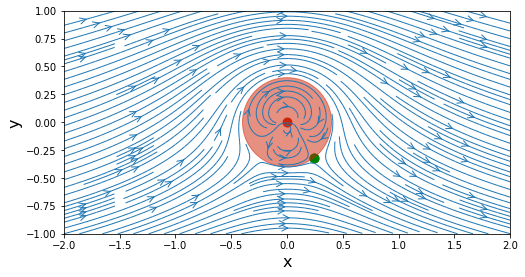

In [71]:
# plot the streamlines 
pyplot.figure(figsize=(8.0,8.0))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1.5, arrowstyle='->')
circle = pyplot.Circle((0.0, 0.0), radius=R, color='#CD2305', alpha=0.5)
pyplot.gca().add_patch(circle)
pyplot.scatter(x_vortex, y_vortex, color='#CD2305', s=80, marker='o')
pyplot.scatter([x_stagn1, x_stagn2], [y_stagn1, y_stagn2], color='g', s=80, marker='o')
pyplot.axis('scaled', adjustable='box');

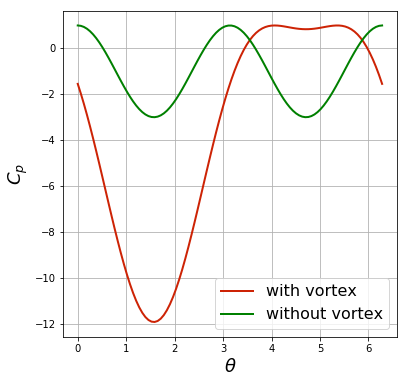

In [75]:
# calculate the surface tangential velocity on the cylinder
theta = numpy.linspace(0.0, 2 * math.pi, 100)
u_theta = -2 * u_inf * numpy.sin(theta) - gamma / (2 * math.pi * R)

# compute the surface pressure coefficient
cp = 1.0 - (u_theta / u_inf)**2

# if there was no vortex
u_theta_no_vortex = -2 * u_inf * numpy.sin(theta)
cp_no_vortex = 1.0 - (u_theta_no_vortex / u_inf)**2

# plot the surface pressure coefficient
size = 6
pyplot.figure(figsize=(size, size))
pyplot.grid(True)
pyplot.xlabel(r'$\theta$', fontsize=18)
pyplot.ylabel('$C_p$', fontsize=18)
#pyplot.xlim(theta.min(), theta.max())
pyplot.plot(theta, cp,
            label='with vortex', color='#CD2305', linewidth=2, linestyle='-')
pyplot.plot(theta, cp_no_vortex,
            label='without vortex', color='g', linewidth=2, linestyle='-')
pyplot.legend(loc='best', prop={'size':16});